# Taxi Fare Prediction  

# Exploratory Data Analysis 

In [41]:
import pandas as pd
import numpy as np

from scipy import stats
from scipy.stats import ttest_ind

# Visualization (for EDA and spotting outliers)
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('taxi_trip_pricing.csv')  # Replace with actual file

In [4]:
df.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [6]:
df.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [7]:
#checking for missing value
df.isnull().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [8]:
#checking for duplicate
df.duplicated().sum()

0

In [10]:
#categorical features

# Identify categorical columns
categorical_cols = ['Time_of_Day', 'Day_of_Week', 'Traffic_Conditions', 'Weather']

# Summarize each categorical column
for col in categorical_cols:
    print(f"\nSummary of {col}:")
    print(df[col].value_counts(dropna=False))  # Includes NaN counts



Summary of Time_of_Day:
Afternoon    371
Morning      283
Evening      203
Night         93
NaN           50
Name: Time_of_Day, dtype: int64

Summary of Day_of_Week:
Weekday    655
Weekend    295
NaN         50
Name: Day_of_Week, dtype: int64

Summary of Traffic_Conditions:
Low       397
Medium    371
High      182
NaN        50
Name: Traffic_Conditions, dtype: int64

Summary of Weather:
Clear    667
Rain     227
Snow      56
NaN       50
Name: Weather, dtype: int64



    Overall insight

    Peak demand: Afternoon & Weekday trips in clear weather with low-to-medium traffic.

    Low demand: Night trips, weekends, snowy conditions, or high traffic scenarios.

    Missing values: All categorical features have 50 missing entries (likely from the same rows), which must be cleaned or imputed.

    These insights will guide feature engineering, like creating rush hour flags, weekday/weekend indicators, and weather impact features for modeling trip price or demand.



# Conducting  Inferential Statistics on dataset 

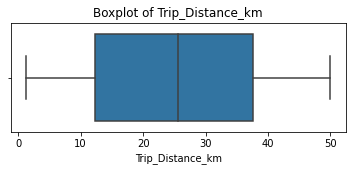

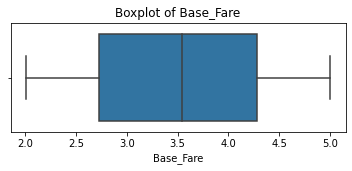

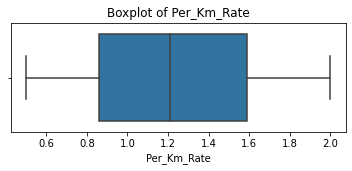

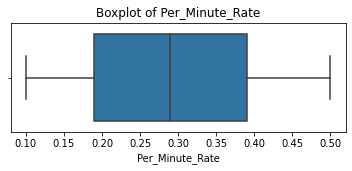

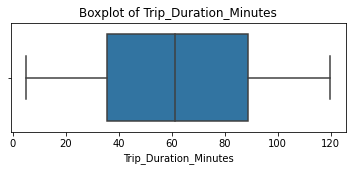

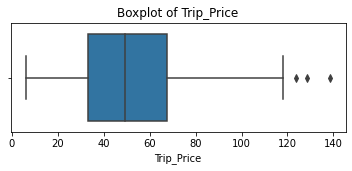

In [36]:
# 1-Outlier Detection
#boxplot visual inspection


# Boxplots for numeric columns
numeric_cols = ['Trip_Distance_km', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 
                'Trip_Duration_Minutes', 'Trip_Price']

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Explanation

The majority of trips (box region) fall within a moderate distance range .

The 20 outlier points above the upper whisker represent very long trips that are rare compared to the rest of the data.

No extreme outliers are below the lower whisker, meaning very short trips are not unusually far from the norm.

In [39]:
#Z score method

z_scores = np.abs(stats.zscore(df[numeric_cols], nan_policy='omit'))
outliers = (z_scores > 3)  # Values with Z > 3 are considered outliers

print("Outliers detected per column:\n", outliers.sum(axis=0))


Outliers detected per column:
 Trip_Distance_km         20
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Trip_Price               20
dtype: int64


Explanation
    
    Connecting Z-score & Boxplot

    Both methods identify extreme points beyond the normal range.

    Z-score is statistical (standard deviations), while boxplot (IQR) is visual (quartile-based).

    In this case, both flagged 20 high-distance/high-price trips as outliers.

In [42]:
#2-Hypothesis Testing
#test relationships between variables
# t-Test (Binary Category vs. Continuous Variable)

weekday_price = df[df['Day_of_Week'] == 'Weekday']['Trip_Price'].dropna()
weekend_price = df[df['Day_of_Week'] == 'Weekend']['Trip_Price'].dropna()

t_stat, p_value = ttest_ind(weekday_price, weekend_price)
print(f"T-test results: t-stat={t_stat:.3f}, p-value={p_value:.4f}")


T-test results: t-stat=1.021, p-value=0.3077


Explanation

The t-test result (t=1.021, p=0.308) indicates no statistically significant difference
in average trip prices between weekdays and weekends (p > 0.05). We therefore fail to reject 
the null hypothesis and conclude that day type does not impact trip price significantly in this dataset

Correlation Matrix:
                        Trip_Distance_km  Trip_Duration_Minutes  Trip_Price
Trip_Distance_km               1.000000              -0.022102    0.849123
Trip_Duration_Minutes         -0.022102               1.000000    0.221211
Trip_Price                     0.849123               0.221211    1.000000


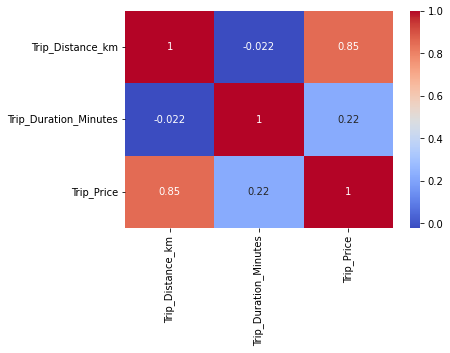

In [43]:
# Correlation Tests (Numeric vs. Numeric)
#Check correlation between Trip Distance and Trip Price.

corr = df[['Trip_Distance_km', 'Trip_Duration_Minutes', 'Trip_Price']].corr(method='pearson')
print("Correlation Matrix:\n", corr)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()


Insight

Trip_Distance_km vs Trip_Price (0.849 – Strong Positive)

High positive correlation: As trip distance increases, trip price also increases significantly.

This is expected since price is largely calculated based on distance.


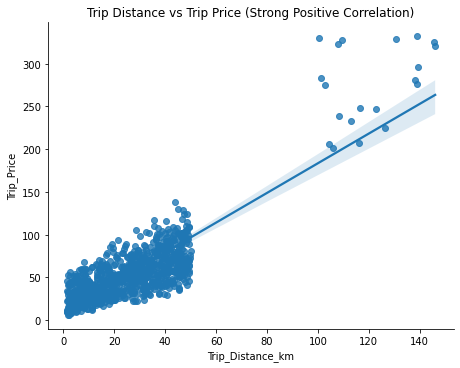

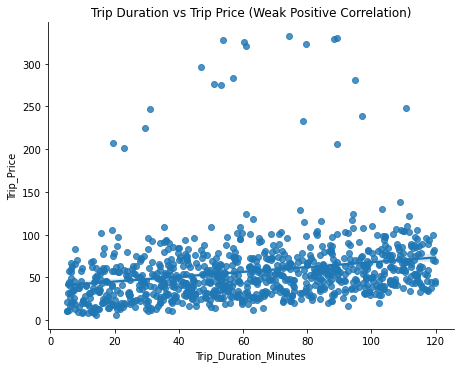

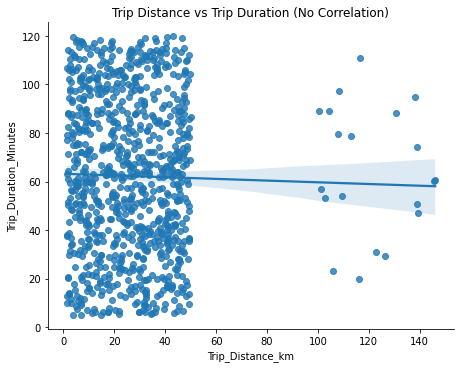

In [45]:
#Scatter Plot with Regression Lines with forcus on key relationship

#  Trip Distance vs Trip Price
sns.lmplot(x='Trip_Distance_km', y='Trip_Price', data=df, height=5, aspect=1.3)
plt.title('Trip Distance vs Trip Price (Strong Positive Correlation)')
plt.show()

# Trip Duration vs Trip Price
sns.lmplot(x='Trip_Duration_Minutes', y='Trip_Price', data=df, height=5, aspect=1.3)
plt.title('Trip Duration vs Trip Price (Weak Positive Correlation)')
plt.show()

#  Trip Distance vs Trip Duration
sns.lmplot(x='Trip_Distance_km', y='Trip_Duration_Minutes', data=df, height=5, aspect=1.3)
plt.title('Trip Distance vs Trip Duration (No Correlation)')
plt.show()


Explanations

Distance vs. Trip Price (Strong Positive)

Clear upward trend: As distance increases, price increases.
Points closely follow the regression line means strong linear relationship.


Duration vs. Trip Price (Weak Positive)

Slight upward trend, but points are more scattered.
Indicates trip time only weakly affects price (time-based charges contribute less to fare).


Distance vs. Trip Duration (No Correlation)

No visible trend; points are widely scattered.
Confirms distance does not determine duration—traffic and route variations impact trip time independently.

#  Numerical Features (Continuous Variables)

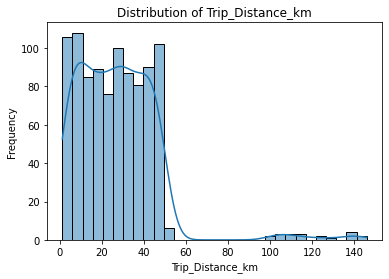

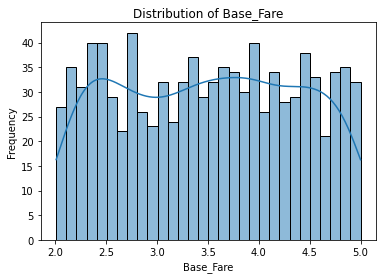

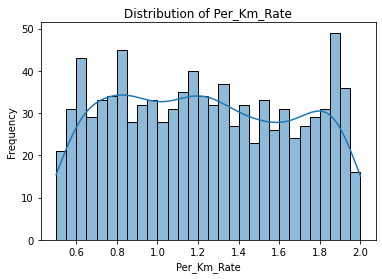

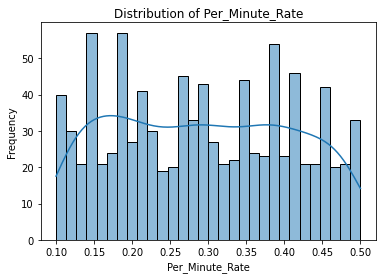

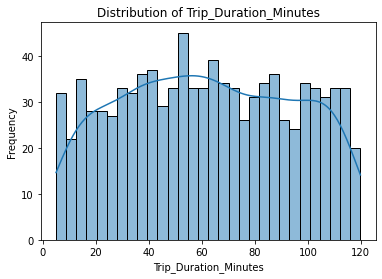

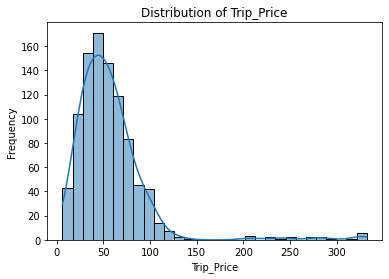

In [46]:
#histograms, KDE plots


numeric_cols = ['Trip_Distance_km', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 
                'Trip_Duration_Minutes', 'Trip_Price']

# Histograms with KDE (Kernel Density Estimate)
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    


Explanation


Right-skewed distributions (distance, duration, price): Common in transportation datasets due to many short trips and few long ones.

Outliers visible at the far-right end: These represent rare but legitimate cases or potential errors.

Potential Need for Transformation: Skewed features (distance, price) may benefit from log transformation if used in modeling.

# Feature Selection and Engineering 

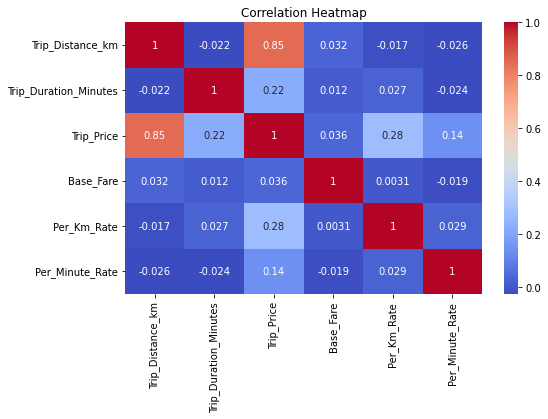

In [47]:
#Correlation Check (Multicollinearity)

# Correlation matrix for numeric features
corr_matrix = df[['Trip_Distance_km', 'Trip_Duration_Minutes', 'Trip_Price', 
                  'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()



Observations from the Heatmap

Trip_Distance_km vs Trip_Price (0.85 – Strong Positive):As distance increases, price increases significantly.
This is expected since fare pricing is distance-based.

Trip_Duration_Minutes vs Trip_Price (0.22 – Weak Positive):Slight increase in price with longer duration, but weak compared to distance.
Trip_Distance_km vs Trip_Duration_Minutes (-0.022 – No Correlation):Duration does not strongly depend on distance, possibly due to traffic and route variations.
Other Fare Rate Features (Base_Fare, Per_Km_Rate, Per_Minute_Rate):Very low correlations with distance and price.
Indicates these rates are fairly fixed or standardized across trips.